## Image Segmentation of WBC & RBC

In [1]:
# Load image
import cv2
print(cv2.__file__)
import numpy as np
from matplotlib import pyplot as plt
import glob



/home/user1/.local/lib/python3.6/site-packages/cv2/cv2.cpython-36m-x86_64-linux-gnu.so


#### Upload Image

In [2]:
file_paths = glob.glob("/home/user1/Documents/kaggle-OHN/blood_cell/dataset-master/JPEGImages" + '/**/*.jpg', recursive=True)


In [3]:
image_normal= cv2.imread(file_paths[10], 1)


### View Image --- No editing, contrast

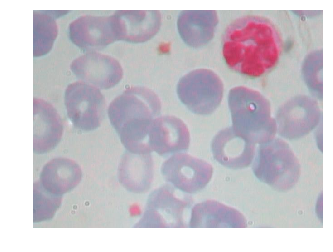

In [4]:
plt.imshow(image_normal), plt.axis("off")
plt.show()

### K-MEANS Segmentation

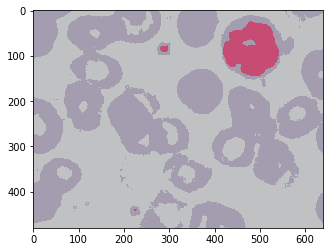

True

In [73]:
import numpy as np
import cv2
from matplotlib import pyplot as plt



img = cv2.imread(file_paths[10])
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

plt.imshow(res2)
plt.show()

cv2.imwrite('res2.jpg', res2)

####KMEANs -----> GrayScale

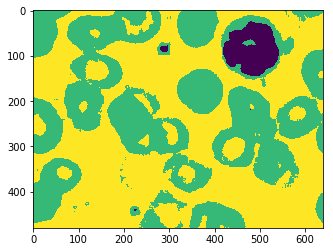

In [74]:
im_gray=cv2.cvtColor(res2,cv2.COLOR_BGR2GRAY)
#im_gray = cv2.imread(res2,cv2.IMREAD_GRAYSCALE)
plt.imshow(im_gray)

## Isolating WBC
### Using Global Thresholding to isolate WBC

#### Kmeans----> GrayScale ---> Thresholding 

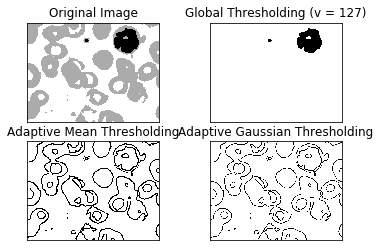

In [75]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.medianBlur(im_gray,5)

ret,th1 = cv2.threshold(img,120,50,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


#### Unedited Image ----> Thresholding

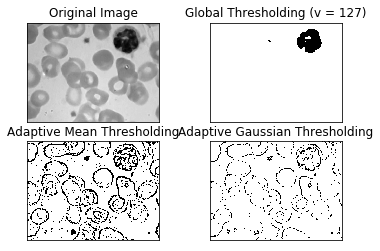

True

In [77]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image_normal= cv2.imread(file_paths[10], 1)

image_normal=cv2.cvtColor(image_normal,cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(image_normal,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,200,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()
cv2.imwrite('th1.jpg', th1)
cv2.imwrite('img.jpg', img)

### Isolated WBC Image Post-Thresholding

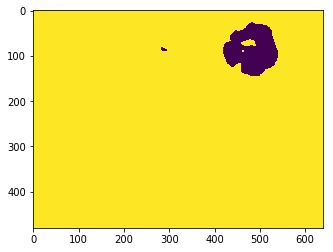

In [78]:
plt.imshow(th1)

#### Counting using Houghs Gradient

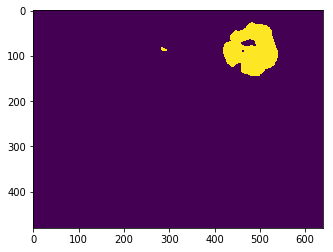

Number of WBCs = 1


In [79]:
import cv2
import numpy as np

cimg = th1
cimg = cv2.bitwise_not(cimg)
#cimg = cv2.medianBlur(cimg,5)

#plt.imshow(cimg)
#cimg = cv2.cvtColor(cimg,cv2.COLOR_GRAY2BGR)
#for g in range(1,200):
circles = cv2.HoughCircles(cimg,cv2.HOUGH_GRADIENT,4,360,param1=1,param2=200,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(cimg)
plt.show()

len(circles)
print("Number of WBCs =", circles.shape[1])                                

### Counting using findCountours/ color thresholding

# of Possible WBCs 2


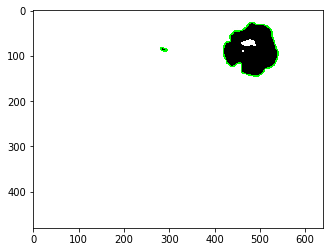

In [80]:
# import the necessary packages
import numpy as np
import argparse
import cv2
#print(cv2.__version__)

 
# load the imagecv2.imread
image_normal= cv2.imread('th1.jpg')
#image_normal = cv2.blur(image_normal,(10,10))


# find all the 'black' shapes in the image
lower = np.array([0, 0, 0])
upper = np.array([150, 150, 150
                 ])
shapeMask = cv2.inRange(image_normal, lower, upper)
# find the contours in the mask
img,cnts, _ = cv2.findContours(shapeMask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print ("# of Possible WBCs %d" % (len(cnts)))
cv2.imshow("Mask", shapeMask)
 
# loop over the contours
for c in cnts:
    # draw the contour and show it
    cv2.drawContours(image_normal, [c], -1, (0, 250, 0), 2)
    plt.imshow(image_normal)
    

### Isolating RBCs

### Thresholding 

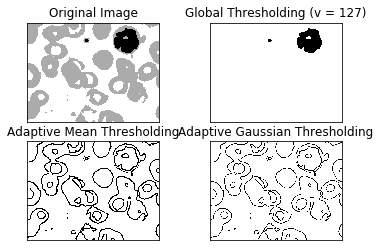

In [107]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.medianBlur(im_gray,5)

ret,th1 = cv2.threshold(img,125, 200,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


### Subtract WBC image from OG image to remove WBCs

In [84]:
import PIL
th1= cv2.imread('th1.jpg')
img= cv2.imread('img.jpg')



def diff(img,img1): # returns just the difference of the two images
    return cv2.subtract(img,img1)

sub_img= diff(th1,img)
cv2.imwrite('sub_img.jpg',sub_img)


True

### K-Means Clustering

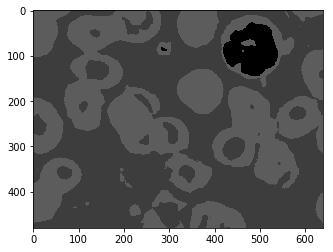

True

In [98]:
import numpy as np
import cv2
from matplotlib import pyplot as plt



img = cv2.imread('sub_img.jpg')
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

plt.imshow(res2)
plt.show()
cv2.imwrite('sub_img.jpg',res2)

### Count RBCs

# of Possible RBCs 31


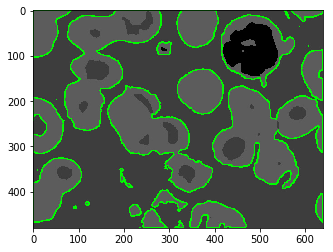

In [109]:
# import the necessary packages
import numpy as np
import argparse
import cv2
#print(cv2.__version__)

 
# load the imagecv2.imread
image_normal= cv2.imread('sub_img.jpg')
#image_normal = cv2.blur(image_normal,(10,10))


# find all the 'black' shapes in the image
lower = np.array([75, 75, 75])
upper = np.array([360, 360, 360
                 ])
shapeMask = cv2.inRange(image_normal, lower, upper)
# find the contours in the mask
img,cnts, _ = cv2.findContours(shapeMask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print ("# of Possible RBCs %d" % (len(cnts)))
cv2.imshow("Mask", shapeMask)
 
# loop over the contours
for c in cnts:
    # draw the contour and show it
    cv2.drawContours(image_normal, [c], -1, (0, 250, 0), 2)
    plt.imshow(image_normal)
